In [1]:
# to import configured paths and other settings
import configparser

# basic libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# OLS
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
# importing config.ini settings
config = configparser.ConfigParser()
config.read("../../../src/config.ini")

# output path
output = config['paths']['data_path']

# Bayesian Inference

# Conditional Probability
The probability of an event $A$, given that event $B$ has occured and $P(B)>0$.
It is defined by the formula, $P(A|B) = \frac{P(A \bigcap B)}{P(B)}$

# Law of Total Probability
$P(A) = \sum\limits_{i=1}^{m} P(B_i \bigcap A) = \sum\limits_{i=1}^{m}P(B_i)P(A|B_i)$

# Baye's Theorem
$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$

# Distributions
Mean: Average Value -> $\mu$ <br>
Variance: How spread out the data is -> $\sigma^2$ <br>
$X \sim N$

# Discrete vs Continuous
Discrete: Finite and countable outcomes <br>

Continuous: Infinite outcomes <br>

# Uniform Distribution $X \sim U(a,b)$
All outcomes have equal probability. <br>
Ex: 6 sided die <br>
Both the mean and variance are uninterpretable. This has no predictive power.

# Bernoulli Distribution $X \sim Bern(p) = B(1,p)$
Events with 1 trial and 2 possible outcomes. <br>
Ex: Coin flip <br>
$p$ is known or past data indicates some experimental probability. <br>
$E(X)=p$, given that $p>1-p$ <br>
$p$ represents the likelihood of the favoured event. <br>
$\sigma^2 = p(1-p)$

# Binomial Distribution $X \sim B(n, p)$
A sequence of identical Bernoulli events. <br>
Ex: A quiz of True or False questions. <br>
The graph represents the number of times the favoured outcome occurs. <br>
$P(X)= \binom{n}{k} p^k(1-p)^{n-k}$ <br>
$E(X)= \sum\limits_{i=1}^{n}x_i p_i$ <br>
$\sigma^2 = E(x^2)-E(x)^2 = np(1-p)$

# Poisson Distribution $X \sim Po(\lambda)$
The frequency with which an event occurs in a specific interval. Requires
you know how often an event occurs within an interval. <br>
Ex: How often a firefly will light up X times in Y seconds. <br>
$P(X)=\frac{\lambda^x e^{-\lambda}}{x!}$ <br>
$E(X) = \sum\limits_{i=0}^n x_i \frac{\lambda^{x_i} e^{-\lambda}}{x_i!} = \lambda$ <br>
$\sigma^2 = \sum \limits_{i=0}^n (x_i - \mu)^2 = \lambda$ <br>

# Normal Distribution

# Standard Normal Distribution

# Students' T Distribution

# Chi-Squared Distribution

# Exponential Distribution

# Logistic Distribution


In [3]:
train_data = pd.read_csv(output+'train.csv')

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data['1stFlrSF']

0        856
1       1262
2        920
3        961
4       1145
        ... 
1455     953
1456    2073
1457    1188
1458    1078
1459    1256
Name: 1stFlrSF, Length: 1460, dtype: int64

In [23]:
X = np.array(train_data['1stFlrSF'])
y = np.array(train_data['SalePrice'])
ols = sm.OLS(y, X)

In [24]:
ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                          1.236e+04
Date:                Fri, 10 Jun 2022   Prob (F-statistic):                        0.00
Time:                        02:29:17   Log-Likelihood:                         -18234.
No. Observations:                1460   AIC:                                  3.647e+04
Df Residuals:                    1459   BIC:                                  3.647e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           152.5185      1.372    111.171      0.000     149.827     155.210
==============================================================================
Omnibus:                      244.058   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2977.853
Skew:                           0.368   Prob(JB):                         0.00
Kurtosis:                       9.958   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression
Linear regression describes a linear relationship between a dependent variable 
and one ore more independent variables.

R<sup>2</sup>
* Measurement of how much the dependent variable is explained by changes in the
independent variables. An R<sub>2</sub> of 0.894 indicates 89.4% of the change,
or variance, in the house price can be explained by the 1st floor square footage. 

Adj. R<sup>2</sup>
* The adjusted R<sup>2</sup> based on the number of independent variables. More
independent variables usually penalize the R<sup>2</sup>.

# Assumptions
1. Linearity
2. No endogeneity (ind. and errors are correlated)
3. Normality and homoscedasticity
4. No autocorrelation
5. No multicollinearity


c:\Users\Cristian\anaconda3\envs\updated\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

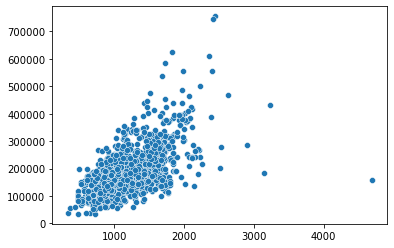

In [14]:
sns.scatterplot(X,y)

(array([165., 735., 385., 147.,  21.,   4.,   2.,   0.,   0.,   1.]),
 array([ 334. ,  769.8, 1205.6, 1641.4, 2077.2, 2513. , 2948.8, 3384.6,
        3820.4, 4256.2, 4692. ]),
 <BarContainer object of 10 artists>)

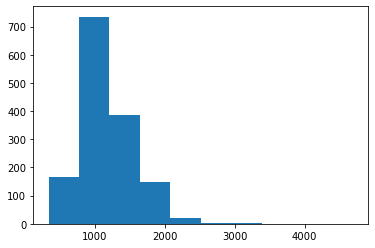

In [15]:
plt.hist(train_data['1stFlrSF'])

In [34]:
preds = ols.predict(X.reshape(-1,1))

ValueError: shapes (1460,1) and (1460,1) not aligned: 1 (dim 1) != 1460 (dim 0)

In [ ]:
residuals = train_data['1stFlrSF']-preds
plt.scatter(train_data['1stFlrSF'], residuals)